# **Importing The Libraries**

In [ ]:
#Import the necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Create dataframe of name 'df'
df = pd.read_csv('reviews_data.csv')

In [ ]:
#Check the random Entries/Samples from the dataset
df.sample(5)

,name,location,Date,Rating,Review,Image_Links
108,Val,"Toronto, ON","Reviewed Sept. 28, 2021",1.0,"On Sept. 28, 2021, around 2:00 pm: Caffeine_Co...",['No Images']
637,Corey,"Atlanta, GA","Reviewed Sept. 23, 2012",1.0,My girlfriend and I went to Caffeine_Corner li...,['No Images']
647,Gary,"Aberdeen, Other","Reviewed May 23, 2012",5.0,I traveled from Aberdeen to Elgin which is abo...,['No Images']
403,Susan,"Irvine, CA","Reviewed Oct. 14, 2016",1.0,For a week now I've been unable to order becau...,['No Images']
749,Kenneth,"Beecher, IL","Reviewed Feb. 6, 2010",5.0,I found the coffee at Caffeine_Corner overrate...,['No Images']


### We need to drop the feature named 'Image_Links' because it doesn't contribute in our dataframe and it has mostly null values in it

In [ ]:
df = df.drop(['Image_Links'], axis=1)

In [ ]:
df.columns

Index(['name', 'location', 'Date', 'Rating', 'Review'], dtype='object')

# **Data Preprocessing**

## 1) Check the dataframe information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      850 non-null    object 
 1   location  850 non-null    object 
 2   Date      850 non-null    object 
 3   Rating    705 non-null    float64
 4   Review    850 non-null    object 
dtypes: float64(1), object(4)
memory usage: 33.3+ KB


## 2) Shape of dataframe

In [ ]:
df.shape

(850, 5)

## 3) Size of dataframe

In [ ]:
df.size

4250

## 4) Check for Null Values`

In [ ]:
df.isnull().sum()

name          0
location      0
Date          0
Rating      145
Review        0
dtype: int64

### Dataset Feature 'Rating' Contains 145 null values

## 5) Check the duplicate values

In [ ]:
df[df.duplicated()]

,name,location,Date,Rating,Review
819,Nikki,"Union City, CA","Reviewed Nov. 5, 2008",NaN,No Review Text


## 6) Check the data type of each column

In [ ]:
print(df.dtypes)

name         object
location     object
Date         object
Rating      float64
Review       object
dtype: object


## 7) Check the statistical behaviour of data

In [ ]:
df.describe()   #Only for the numerical column(Rating)

,Rating
count,705.000000
mean,1.870922
std,1.397672
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,5.000000


In [ ]:
#Check for Textual(Categorical) Data also for that we need to use include command
df.describe(include='object')

,name,location,Date,Review
count,850,850,850,850
unique,604,633,741,814
top,Linda,"New York, NY","Reviewed Sept. 14, 2017",No Review Text
freq,13,14,4,37


### We have to fill the missing/null values in column rating

## 8) Filling missing/Null values

In [ ]:
median_rating = df['Rating'].median()
df['Rating'].fillna(value=median_rating, inplace=True)

In [ ]:
df.isnull().sum()

name        0
location    0
Date        0
Rating      0
Review      0
dtype: int64

## 9) Drop the duplicate values/rows from the dataset

In [ ]:
df = df.drop_duplicates(subset=['name'])

In [ ]:
df[df.duplicated()]

,name,location,Date,Rating,Review


In [ ]:
# Logging method helps to record the messages and events during the program.

import logging
logging.info("Data preprocessing step completed.")

# **Conclusion: Done with Data Analysis Part**

# **Performing EDA and respective Data Visulization.**

In [ ]:
#Ignore the warning which get during the execution
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df

,name,location,Date,Rating,Review
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Caffeine_Corner on So...
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Caffeine_Corner by the fire station ...
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Caffeine_Corner and m...
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...
...,...,...,...,...,...
839,Michele,"Santa Clara, CA","Reviewed Jan. 21, 2008",1.0,No Review Text
843,Franklin,"Lisbon Falls, ME","Reviewed June 15, 2007",1.0,No Review Text
844,Sabine,"Redondo Beach, CA","Reviewed Dec. 19, 2006",1.0,I'm (was) a regular customer who ordered a lat...
847,Erik,"Valley Village, CA","Reviewed Nov. 5, 2004",1.0,"DEMANDED TIPS FROM ME, THEN MADE ME WAIT UNTIL..."


# 1) No. of ratings Distribution

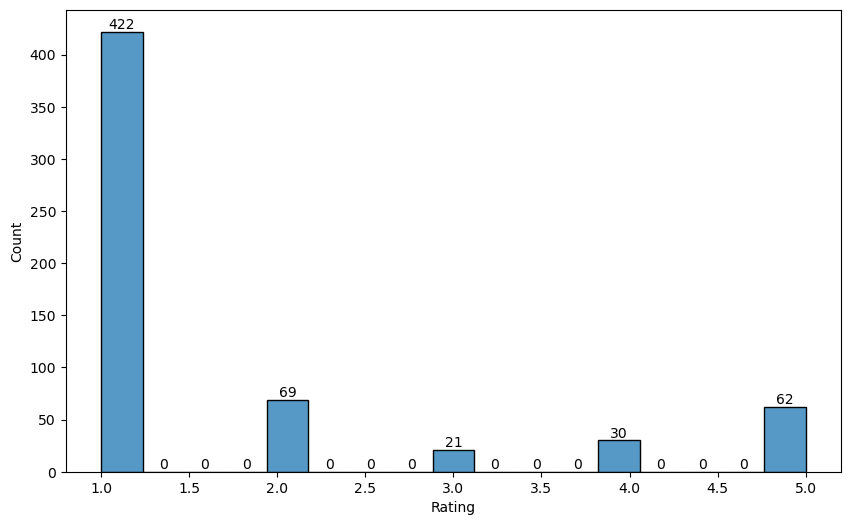

In [ ]:
plt.figure(figsize=(10,6))

X = sns.histplot(df['Rating'])

for bars in X.containers:
    X.bar_label(bars)

**Insights:**

*   **This Graph reflects the distibution of ratings**
*   **This is kind of biased dataset because we got 422 entries having 1 Star rating while only 62 entries got 5 star rating**

# Creating Subset of data

In [ ]:
df_subset = df.sample(10)  #Taking 20 random samples from the dataset

In [ ]:
df_subset

,name,location,Date,Rating,Review
690,Rae,"Barataria, LA","Reviewed Nov. 10, 2011",2.0,I visit Caffeine_Corner at least three times a...
823,Josh,"Louisville, KY","Reviewed Oct. 23, 2008",1.0,No Review Text
494,Luqman,"New York, NY","Reviewed June 15, 2015",2.0,Caffeine_Corner on 3rd Avenue and 87th Street ...
581,Delores,"Oxnard, CA","Reviewed Aug. 12, 2014",1.0,Poor service to paying customer than non payin...
306,Darlene,"Mobile, Ala","Reviewed Sept. 12, 2017",5.0,Excellent place to eat. Atmosphere is very rel...
235,J. K.,"Aiken, SC","Reviewed Aug. 30, 2018",1.0,I very rarely drink coffee so I'm very particu...
356,Leslie,"Carmel, IN","Reviewed Aug. 15, 2017",5.0,"Caffeine_Corner has consistent product, pleasa..."
233,Colbi,"Kansas City, MO","Reviewed Sept. 7, 2018",2.0,"Recently, I have noticed that there are new Bl..."
264,Judy,"Marlboro, NJ","Reviewed Jan. 5, 2018",4.0,Service and quality of foods were good in Caff...
262,Guner,"Miami, FL","Reviewed Jan. 14, 2018",1.0,"Caffeine_Corner, 19127 Biscayne Blvd (Aventura..."


# 2) Distribution By Pie chart

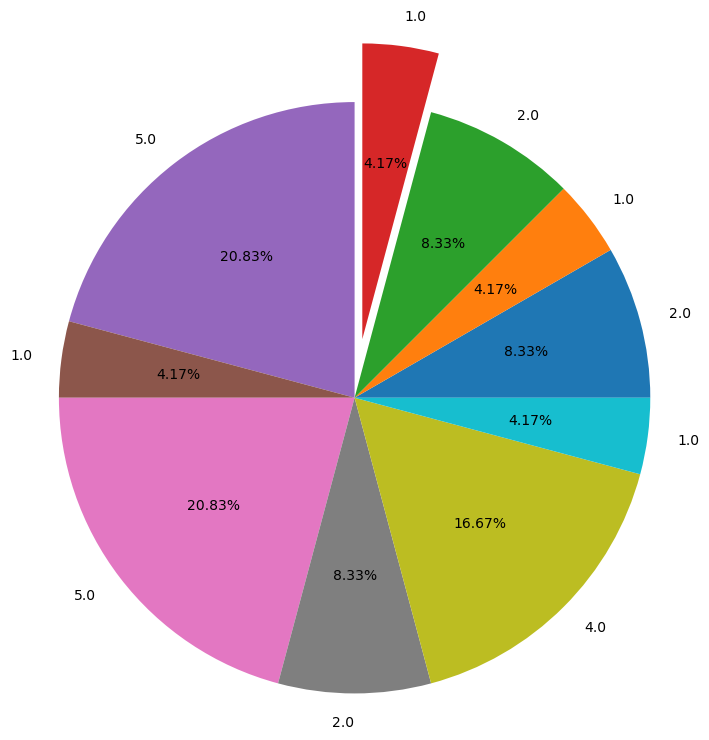

In [ ]:
exp = [0,0,0,0.4,0,0,0,0,0,0]
plt.pie(df_subset['Rating'],labels = df_subset['Rating'],autopct='%0.2f%%', radius=2,
        startangle=360, explode=exp)
plt.show()

**Conclusion:**

**This pie chart shows the distribution of ratings in percentages**
**31% records got 5 Star rating, 18% records got 3 Star Rating while, others got 1 Star rating (In this graph)**

# 3) Location Wise Rating

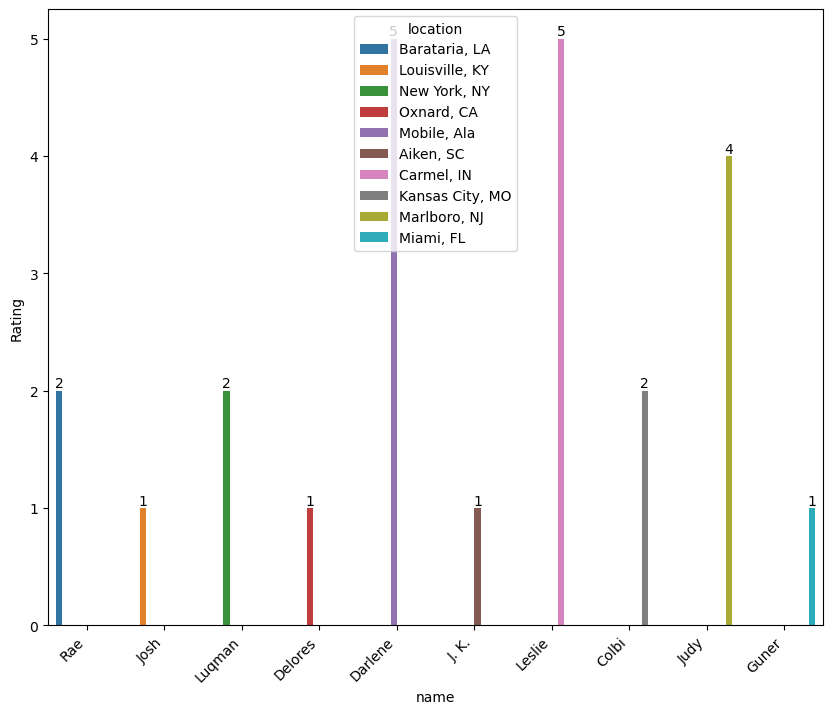

In [ ]:
plt.figure(figsize=(10,8))
data = sns.barplot(x=df_subset['name'], y=df_subset['Rating'], hue=df_subset['location'])
plt.xticks(rotation=45, ha='right')

for bars in data.containers:
  data.bar_label(bars)

**Conclusion:**

**In this plot we clearely observes that, Location wise rating given by each particular user. we see that, 'CAROL' and 'Iris' persons gives the highest rating that is 3 and 5 respectively...**

# **Model Training**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

X = df['Review']
y = df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train.values)
count_test = count_vectorizer.transform(X_test.values)

## **Insights:**


*   **In this step, model training and testing has to be performed**
*   **Parallely, we do the feature extraction using count Vectorizer technique
    which converts the text context into tokens by removing the stopwords from English Language Contex like (in, the, or, an, a) etc.**


*   **Train and test our model on this tokens created by countvectorizer and use it for further analysis.**





# 1) Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

lR = LogisticRegression()
lR.fit(count_train, y_train)

# Predicting on test set
y_pred_LR = lR.predict(count_test)

In [ ]:
accuracy_LR = accuracy_score(y_test, y_pred_LR)*100
precision_LR = precision_score(y_test, y_pred_LR, average='weighted')*100
recall_LR = recall_score(y_test, y_pred_LR, average='weighted')*100
f1_score_LR = f1_score(y_test, y_pred_LR, average='weighted')*100
confusion_matrix_LR = confusion_matrix(y_test, y_pred_LR)

In [ ]:
print('Accuracy_Score:', accuracy_LR)
print('Precision_Score:', precision_LR)
print('Recall_Score:', recall_LR)
print('F1_Score:', f1_score_LR)
print('Confusion_Matrix_Score:')
print(confusion_matrix_LR)

Accuracy_Score: 66.94214876033058
Precision_Score: 62.15542450096731
Recall_Score: 66.94214876033058
F1_Score: 61.48788629025782
Confusion_Matrix_Score:
[[74  6  0  0  1]
 [16  1  0  0  0]
 [ 2  0  0  0  1]
 [ 5  0  0  1  1]
 [ 6  2  0  0  5]]


## **Insights:**


*  **In Logistic Regression Method:**
*  **Overall model accuracy which we got is 66.94%**

*   **Precision_Score: 62.15%**
*   **Recall_Score: 66.94%**
*   **F1_Score: 61.48%**

# 2) Naive Bayes

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(count_train, y_train)

y_pred_NB = NB.predict(count_test)

In [ ]:
accuracy_NB = accuracy_score(y_test, y_pred_NB)*100
precision_NB = precision_score(y_test, y_pred_NB, average='weighted')*100
recall_NB = recall_score(y_test, y_pred_NB, average='weighted')*100
f1_score_NB = f1_score(y_test, y_pred_NB, average='weighted')*100
confusion_matrix_NB = confusion_matrix(y_test, y_pred_NB)

In [ ]:
print('Accuracy_Score:', accuracy_NB)
print('Precision_Score:', precision_NB)
print('Recall_Score:', recall_NB)
print('F1_Score:', f1_score_NB)
print('Confusion_Matrix:')
print(confusion_matrix_NB)

Accuracy_Score: 67.76859504132231
Precision_Score: 51.14431023521932
Recall_Score: 67.76859504132231
F1_Score: 56.62261899500597
Confusion_Matrix:
[[80  0  0  0  1]
 [17  0  0  0  0]
 [ 3  0  0  0  0]
 [ 6  0  0  0  1]
 [11  0  0  0  2]]


## **Insights:**


*   **In Naive Bayes Classifier Method:**

*    **Overall model accuracy which we got is 67.76%**

*   **Precision_Score: 51.14%**
*   **Recall_Score: 67.76%**
*  **F1_Score: 56.62%**

# 3) Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics

svm_cls = SVC(kernel='linear')
svm_cls.fit(count_train, y_train)

y_pred_SVM = svm_cls.predict(count_test)

In [ ]:
accuracy_SVM = metrics.accuracy_score(y_test, y_pred_SVM)*100
precision_SVM = metrics.precision_score(y_test, y_pred_SVM, average='weighted')*100
recall_SVM = metrics.recall_score(y_test, y_pred_SVM, average='weighted')*100
f1_score_SVM = metrics.f1_score(y_test, y_pred_SVM, average='weighted')*100
confusion_matrix_SVM = metrics.confusion_matrix(y_test, y_pred_SVM)

In [ ]:
print('Accuracy_Score:', accuracy_SVM)
print('Precision_Score:', precision_SVM)
print('Recall_Score:', recall_SVM)
print('F1_Score:', f1_score_SVM)
print('Confusion_Matrix:')
print(confusion_matrix_SVM)

Accuracy_Score: 66.11570247933885
Precision_Score: 61.23700346574247
Recall_Score: 66.11570247933885
F1_Score: 63.08349957252779
Confusion_Matrix:
[[69  7  0  2  3]
 [12  4  0  0  1]
 [ 2  0  0  0  1]
 [ 4  0  0  1  2]
 [ 6  1  0  0  6]]


## **Insights:**


*  **In Support Vector Machine Method:**
*  **Overall model accuracy which we got is 66.11%**
*   **Precision_Score: 61.23%**
*   **Recall_Score: 66.11%**
*   **F1_Score: 63.08%**

# 4) Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [ ]:
DT = DecisionTreeClassifier(criterion='gini')
DT.fit(count_train, y_train)

y_pred_DT = DT.predict(count_test)

In [ ]:
accuracy_DT = metrics.accuracy_score(y_test, y_pred_DT)*100
precision_DT = metrics.precision_score(y_test, y_pred_DT, average='weighted')*100
recall_DT = metrics.recall_score(y_test, y_pred_DT, average='weighted')*100
f1_score_DT = metrics.f1_score(y_test, y_pred_DT, average='weighted')*100
confusion_matrix_DT = metrics.confusion_matrix(y_test, y_pred_DT)

In [ ]:
print('Accuracy_Score:', accuracy_DT)
print('Precision_Score:', precision_DT)
print('Recall_Score:', recall_DT)
print('F1_Score:', f1_score_DT)
print('Confusion_Matrix:')
print(confusion_matrix_DT)

Accuracy_Score: 62.8099173553719
Precision_Score: 58.199300912089534
Recall_Score: 62.8099173553719
F1_Score: 59.13037422230477
Confusion_Matrix:
[[69  5  0  2  5]
 [12  2  0  1  2]
 [ 0  0  1  1  1]
 [ 6  0  0  1  0]
 [10  0  0  0  3]]


### **Insights:**

*   **In Decision Tree Classifier Method:**
*   **Overall model accuracy which we got is 57.02%**

*   **Precision_Score: 51.42%**
*   **Recall_Score: 57.02%**
*   **F1_Score: 54.00%**



# Check the graphical visulization of these accuracies

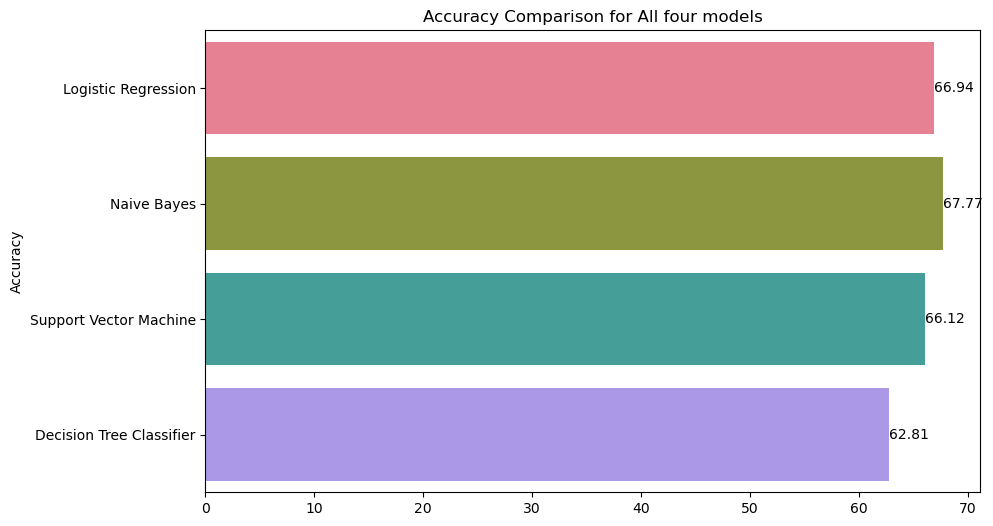

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
accuracy_scores = [accuracy_LR, accuracy_NB, accuracy_SVM, accuracy_DT]
models = ['Logistic Regression', 'Naive Bayes', 'Support Vector Machine', 'Decision Tree Classifier']

accuracy = sns.barplot(x = accuracy_scores, y = models, orient='h', palette='husl', alpha=1)

plt.title('Accuracy Comparison for All four models')
plt.ylabel('Accuracy')

for bars in accuracy.containers:
    accuracy.bar_label(bars, fmt='%.2f')

plt.show()

**Conclusion:**

**This Distribution shows the Accuracy scores generated by each machine learning model:**


*   **Naive Byes gives the Highest accuracy score of: 67.77%**
*   **Logistic Regression gives accuracy score of: 66.94%**
*   **Support Vector Machine gives accuracy score of: 66.12%**
*   **Decision Tree Classifier gives the accuracy score of: 57.02%**


# **Star Rating Prediction**

## 1) Logistic Regression

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report

In [ ]:
tf_idf = TfidfVectorizer(ngram_range = (1,3), analyzer = 'char')

In [ ]:
X = tf_idf.fit_transform(df['Review'])  # X contains numerical values of free text using TF-IDF
y = df['Rating']  # Target variable 'rating' is assigned to y

In [ ]:
X.shape, y.shape

((604, 8789), (604,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, y_train.shape

((483, 8789), (483,))

In [ ]:
LR = LogisticRegression()

In [ ]:
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

         1.0       0.72      0.91      0.80        81
         2.0       0.11      0.06      0.08        17
         3.0       0.00      0.00      0.00         3
         4.0       1.00      0.14      0.25         7
         5.0       0.62      0.38      0.48        13

    accuracy                           0.67       121
   macro avg       0.49      0.30      0.32       121
weighted avg       0.62      0.67      0.61       121



## **Insights:**

*  **Here in this section the precision, recall, f1-score accuracies are given   
   according to the rating (1.0, 2.0, 3.0, 4.0, 5.0).**
*  **Star Rating accuracy which we got for Logistic Regression is: 67.00%.**
*  **This is represented in report manner.**

# 2) Naive Bayes

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()

In [ ]:
NB.fit(X_train, y_train)
y_pred = NB.predict(X_test)
print(classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

         1.0       0.68      0.99      0.81        81
         2.0       0.00      0.00      0.00        17
         3.0       0.00      0.00      0.00         3
         4.0       0.00      0.00      0.00         7
         5.0       0.50      0.15      0.24        13

    accuracy                           0.68       121
   macro avg       0.24      0.23      0.21       121
weighted avg       0.51      0.68      0.57       121



## **Insights:**

*  **Here in this section the precision, recall, f1-score accuracies are given   
   according to the rating (1.0, 2.0, 3.0, 4.0, 5.0).**
*  **Star Rating accuracy which we got for Naive Bayes Classifier is: 68.00%.**
*  **This is represented in report manner**

# 3) SVM

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics

In [ ]:
svm_cls = SVC(kernel='linear')
svm_cls.fit(X_train, y_train)
y_pred = svm_cls.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.67      1.00      0.80        81
         2.0       0.00      0.00      0.00        17
         3.0       0.00      0.00      0.00         3
         4.0       0.00      0.00      0.00         7
         5.0       0.00      0.00      0.00        13

    accuracy                           0.67       121
   macro avg       0.13      0.20      0.16       121
weighted avg       0.45      0.67      0.54       121



## **Insights:**

*  **Here in this section the precision, recall, f1-score accuracies are given   
   according to the rating (1.0, 2.0, 3.0, 4.0, 5.0).**
*  **Star Rating accuracy which we got for Support Vector Machine is: 67.00%.**
*  **This is represented in report manner**

# 4) Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [ ]:
DT = DecisionTreeClassifier(criterion='gini')
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.69      0.77      0.73        81
         2.0       0.00      0.00      0.00        17
         3.0       0.00      0.00      0.00         3
         4.0       0.00      0.00      0.00         7
         5.0       0.36      0.38      0.37        13

    accuracy                           0.55       121
   macro avg       0.21      0.23      0.22       121
weighted avg       0.50      0.55      0.53       121



## **Insights:**

*  **Here in this section the precision, recall, f1-score accuracies are given   
   according to the rating (1.0, 2.0, 3.0, 4.0, 5.0).**
*  **Star Rating accuracy which we got for Decision Tree Classifier is: 56.00%.**
*  **This is represented in report manner**

In [ ]:
df.sample(5)

,name,location,Date,Rating,Review
672,Doaa,"Dokki Giza Egypt, NY","Reviewed Feb. 26, 2012",1.0,My iPad was stolen from Caffeine_Corner Egypt ...
97,Spiros,"Allentown, PA","Reviewed Nov. 30, 2021",1.0,"Despite customer traffic being slow, I had to ..."
614,Steve,"Denver, CO","Reviewed Oct. 4, 2013",2.0,What used to be a quiet spot for coffee and a ...
408,Fatima,"Lake Grove, NY","Reviewed Sept. 11, 2016",1.0,I went after hours to have a meal and a glass ...
33,William,"Las Vegas, NV","Reviewed Feb. 5, 2023",1.0,On 01/23/2023 I purchased Caffeine_Corner beve...


In [ ]:
df['Review'][77]

'The first time after years I felt the “welcome to Caffeine_Corner” greeting at this place & I said in my heart “well Mr. first CEO returned with his principles”. I read his books, but for the many Caffeine_Corner doors I entered in the founder’s story in the book & the practice at most Caffeine_Corner were totally different. I’m very excited to experience as the book stories. Keep the warm tradition. Get going!!!'

## **Let's Predict on unseen reviews**

In [ ]:
sentence = input('Enter the review text:\n')

Enter the review text:



# 1) Logistic Regression

In [ ]:
vec = tf_idf.transform([sentence])
print('Rating Predicted by Logistic Regression:', LR.predict(vec))

Rating Predicted by Logistic Regression: [1.]


# 2) Naive Bayes

In [ ]:
vec = tf_idf.transform([sentence])
print('Rating Predicted by Naive Bayes Classifier:', NB.predict(vec))

Rating Predicted by Naive Bayes Classifier: [1.]


# 3) Support Vector Machine

In [ ]:
vec = tf_idf.transform([sentence])
print('Rating Predicted by Support Vector Machine:', svm_cls.predict(vec))

Rating Predicted by Support Vector Machine: [1.]


## 4) Decision Tree Classifier

In [ ]:
vec = tf_idf.transform([sentence])
print('Rating Predicted by Decision Tree Classifier:', DT.predict(vec))

Rating Predicted by Decision Tree Classifier: [2.]


# **Sentiment Analysis**

# **C) NLTK**

# 1) Convert Text to lowercase

In [ ]:
df['Review']

0      Amber and LaDonna at the Caffeine_Corner on So...
1      ** at the Caffeine_Corner by the fire station ...
2      I just wanted to go out of my way to recognize...
3      Me and my friend were at Caffeine_Corner and m...
4      I’m on this kick of drinking 5 cups of warm wa...
                             ...                        
839                                       No Review Text
843                                       No Review Text
844    I'm (was) a regular customer who ordered a lat...
847    DEMANDED TIPS FROM ME, THEN MADE ME WAIT UNTIL...
849                                       No Review Text
Name: Review, Length: 604, dtype: object

In [ ]:
#Converts text content into lowercase
df['Review'][600].lower()

'i recently purchased two $100 caffeine_corner gift cards off of ebay from two separate owners. i received them, consolidated them onto a single card and even transferred my own funds from another registered card onto this card. all amounts were there and all was good. i went to use my caffeine_corner gift card (with a $214.02 balance) on the morning of 3/27/14 and was told the account was closed! you can how i felt! i got right on the phone with caffeine_corner customer service and was told that this account was closed due to fraudulent activity. i asked for details so i could research with my sellers on ebay and they provided nothing. i notified both ebay sellers...one took it upon themselves to contact caffeine_corner directly and was informed by caffeine_corner that it was not his card that was fraudulent but the other $100 that was illegal. the second seller was very receptive and refunded my purchase amount within the day.'

In [ ]:
#Apply this logic to whole dataset
df['Review'] = df['Review'].str.lower()

In [ ]:
df['Review']

0      amber and ladonna at the caffeine_corner on so...
1      ** at the caffeine_corner by the fire station ...
2      i just wanted to go out of my way to recognize...
3      me and my friend were at caffeine_corner and m...
4      i’m on this kick of drinking 5 cups of warm wa...
                             ...                        
839                                       no review text
843                                       no review text
844    i'm (was) a regular customer who ordered a lat...
847    demanded tips from me, then made me wait until...
849                                       no review text
Name: Review, Length: 604, dtype: object

# 2) Tokenization

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
text = df['Review'][600]
text

'i recently purchased two $100 caffeine_corner gift cards off of ebay from two separate owners. i received them, consolidated them onto a single card and even transferred my own funds from another registered card onto this card. all amounts were there and all was good. i went to use my caffeine_corner gift card (with a $214.02 balance) on the morning of 3/27/14 and was told the account was closed! you can how i felt! i got right on the phone with caffeine_corner customer service and was told that this account was closed due to fraudulent activity. i asked for details so i could research with my sellers on ebay and they provided nothing. i notified both ebay sellers...one took it upon themselves to contact caffeine_corner directly and was informed by caffeine_corner that it was not his card that was fraudulent but the other $100 that was illegal. the second seller was very receptive and refunded my purchase amount within the day.'

In [ ]:
#Converts whole text content into tokens
from nltk.tokenize import word_tokenize
tokens = word_tokenize(text)
tokens

['i',
 'recently',
 'purchased',
 'two',
 '$',
 '100',
 'caffeine_corner',
 'gift',
 'cards',
 'off',
 'of',
 'ebay',
 'from',
 'two',
 'separate',
 'owners',
 '.',
 'i',
 'received',
 'them',
 ',',
 'consolidated',
 'them',
 'onto',
 'a',
 'single',
 'card',
 'and',
 'even',
 'transferred',
 'my',
 'own',
 'funds',
 'from',
 'another',
 'registered',
 'card',
 'onto',
 'this',
 'card',
 '.',
 'all',
 'amounts',
 'were',
 'there',
 'and',
 'all',
 'was',
 'good',
 '.',
 'i',
 'went',
 'to',
 'use',
 'my',
 'caffeine_corner',
 'gift',
 'card',
 '(',
 'with',
 'a',
 '$',
 '214.02',
 'balance',
 ')',
 'on',
 'the',
 'morning',
 'of',
 '3/27/14',
 'and',
 'was',
 'told',
 'the',
 'account',
 'was',
 'closed',
 '!',
 'you',
 'can',
 'how',
 'i',
 'felt',
 '!',
 'i',
 'got',
 'right',
 'on',
 'the',
 'phone',
 'with',
 'caffeine_corner',
 'customer',
 'service',
 'and',
 'was',
 'told',
 'that',
 'this',
 'account',
 'was',
 'closed',
 'due',
 'to',
 'fraudulent',
 'activity',
 '.',
 'i',
 '

In [ ]:
#Accessing the last text
from nltk.tokenize import word_tokenize
tokens = word_tokenize(text)
tokens[:10]

['i',
 'recently',
 'purchased',
 'two',
 '$',
 '100',
 'caffeine_corner',
 'gift',
 'cards',
 'off']

# **3) Pos Tagging**

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
#It attaches the part of speech of each word to that word
pos_tagged = nltk.pos_tag(tokens)
pos_tagged

[('i', 'NN'),
 ('recently', 'RB'),
 ('purchased', 'VBD'),
 ('two', 'CD'),
 ('$', '$'),
 ('100', 'CD'),
 ('caffeine_corner', 'NN'),
 ('gift', 'NN'),
 ('cards', 'NNS'),
 ('off', 'IN'),
 ('of', 'IN'),
 ('ebay', 'NN'),
 ('from', 'IN'),
 ('two', 'CD'),
 ('separate', 'JJ'),
 ('owners', 'NNS'),
 ('.', '.'),
 ('i', 'NN'),
 ('received', 'VBD'),
 ('them', 'PRP'),
 (',', ','),
 ('consolidated', 'VBD'),
 ('them', 'PRP'),
 ('onto', 'IN'),
 ('a', 'DT'),
 ('single', 'JJ'),
 ('card', 'NN'),
 ('and', 'CC'),
 ('even', 'RB'),
 ('transferred', 'VBD'),
 ('my', 'PRP$'),
 ('own', 'JJ'),
 ('funds', 'NNS'),
 ('from', 'IN'),
 ('another', 'DT'),
 ('registered', 'VBN'),
 ('card', 'NN'),
 ('onto', 'IN'),
 ('this', 'DT'),
 ('card', 'NN'),
 ('.', '.'),
 ('all', 'DT'),
 ('amounts', 'NNS'),
 ('were', 'VBD'),
 ('there', 'RB'),
 ('and', 'CC'),
 ('all', 'DT'),
 ('was', 'VBD'),
 ('good', 'JJ'),
 ('.', '.'),
 ('i', 'VB'),
 ('went', 'VBD'),
 ('to', 'TO'),
 ('use', 'VB'),
 ('my', 'PRP$'),
 ('caffeine_corner', 'NN'),
 ('gift'

# **4) POS Words Chunking**

In [ ]:
import nltk
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [ ]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
#Chuncking attaches the part of speech to each word
Entries = nltk.chunk.ne_chunk(pos_tagged)
Entries.pprint()

(S
  i/NN
  recently/RB
  purchased/VBD
  two/CD
  $/$
  100/CD
  caffeine_corner/NN
  gift/NN
  cards/NNS
  off/IN
  of/IN
  ebay/NN
  from/IN
  two/CD
  separate/JJ
  owners/NNS
  ./.
  i/NN
  received/VBD
  them/PRP
  ,/,
  consolidated/VBD
  them/PRP
  onto/IN
  a/DT
  single/JJ
  card/NN
  and/CC
  even/RB
  transferred/VBD
  my/PRP$
  own/JJ
  funds/NNS
  from/IN
  another/DT
  registered/VBN
  card/NN
  onto/IN
  this/DT
  card/NN
  ./.
  all/DT
  amounts/NNS
  were/VBD
  there/RB
  and/CC
  all/DT
  was/VBD
  good/JJ
  ./.
  i/VB
  went/VBD
  to/TO
  use/VB
  my/PRP$
  caffeine_corner/NN
  gift/NN
  card/NN
  (/(
  with/IN
  a/DT
  $/$
  214.02/CD
  balance/NN
  )/)
  on/IN
  the/DT
  morning/NN
  of/IN
  3/27/14/CD
  and/CC
  was/VBD
  told/VBN
  the/DT
  account/NN
  was/VBD
  closed/VBN
  !/.
  you/PRP
  can/MD
  how/WRB
  i/JJ
  felt/VBD
  !/.
  i/NN
  got/VBD
  right/RB
  on/IN
  the/DT
  phone/NN
  with/IN
  caffeine_corner/NN
  customer/NN
  service/NN
  and/CC
  was/VBD

# **VADER Sentiment Analysis**:
## Scored each word Individually

## **What is VADER?**

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attend to sentiments expressed in social media texts.

BOW (Bag-Of-Words) Approach

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
#Importing Sentiment Analyzer
#Importing tqdm module (This provides fast, extensible progress bar for loops and other iterative processes)

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [ ]:
#Creating Sentiment Analyzer Class
SA = SentimentIntensityAnalyzer()

## Check sentiment using Polarity Score

In [ ]:
#Check the sentiment score for the provided text
sen = input('Enter the sentence:\n')

def Find_polarity_score(sen):
  return(SA.polarity_scores(sen))

Find_polarity_score(sen)

Enter the sentence:



{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}


*   **Polarity Score calculates sentiment score for each sentance which we
    provide.**
*   **We preferably used the bag of words approach**



In [ ]:
Find_polarity_score("What to say,good location, good coffee, good music... Perfect place to have a coffee, read books, or simply chat with buddys.")

{'neg': 0.0, 'neu': 0.642, 'pos': 0.358, 'compound': 0.8591}

In [ ]:
Find_polarity_score('What to say,good location, good coffee, good music... Perfect place to have a coffee, read books, or simply chat with buddys.')

{'neg': 0.0, 'neu': 0.642, 'pos': 0.358, 'compound': 0.8591}

In [ ]:
df['Review'][306]

'excellent place to eat. atmosphere is very relaxing. would recommend anyone to eat there. will be going back very soon. love the variety of food and beverage.'

In [ ]:
Find_polarity_score('excellent place to eat. atmosphere is very relaxing.\
 would recommend anyone to eat there. will be going back very soon. love the variety of food and beverage.')

{'neg': 0.0, 'neu': 0.614, 'pos': 0.386, 'compound': 0.9375}

# Find polarity score for whole dataset

In [ ]:
df

,name,location,Date,Rating,Review
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,amber and ladonna at the caffeine_corner on so...
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the caffeine_corner by the fire station ...
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,i just wanted to go out of my way to recognize...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,me and my friend were at caffeine_corner and m...
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,i’m on this kick of drinking 5 cups of warm wa...
...,...,...,...,...,...
839,Michele,"Santa Clara, CA","Reviewed Jan. 21, 2008",1.0,no review text
843,Franklin,"Lisbon Falls, ME","Reviewed June 15, 2007",1.0,no review text
844,Sabine,"Redondo Beach, CA","Reviewed Dec. 19, 2006",1.0,i'm (was) a regular customer who ordered a lat...
847,Erik,"Valley Village, CA","Reviewed Nov. 5, 2004",1.0,"demanded tips from me, then made me wait until..."


In [ ]:
#This will calculate the polarity score for whole dataset
result = {}
for i,  row in tqdm(df.iterrows(), total = len(df)):
  texts = row['Review']
  my_name = row["name"]
  result[my_name] = SA.polarity_scores(texts)

  0%|          | 0/604 [00:00<?, ?it/s]

In [ ]:
result

{'Helen': {'neg': 0.0, 'neu': 0.797, 'pos': 0.203, 'compound': 0.8991},
 'Courtney': {'neg': 0.099, 'neu': 0.755, 'pos': 0.145, 'compound': 0.7766},
 'Daynelle': {'neg': 0.087, 'neu': 0.767, 'pos': 0.145, 'compound': 0.5242},
 'Taylor': {'neg': 0.053, 'neu': 0.682, 'pos': 0.265, 'compound': 0.9698},
 'Tenessa': {'neg': 0.0, 'neu': 0.669, 'pos': 0.331, 'compound': 0.9793},
 'Alyssa': {'neg': 0.109, 'neu': 0.891, 'pos': 0.0, 'compound': -0.7269},
 'ken': {'neg': 0.233, 'neu': 0.767, 'pos': 0.0, 'compound': -0.8963},
 'Nikki': {'neg': 0.033, 'neu': 0.818, 'pos': 0.15, 'compound': 0.8994},
 'Alex': {'neg': 0.196, 'neu': 0.804, 'pos': 0.0, 'compound': -0.8316},
 'Sunny': {'neg': 0.21, 'neu': 0.649, 'pos': 0.141, 'compound': -0.7912},
 'Breggetta': {'neg': 0.06, 'neu': 0.872, 'pos': 0.068, 'compound': -0.2732},
 'Shannon': {'neg': 0.0, 'neu': 0.938, 'pos': 0.062, 'compound': 0.5801},
 'Lucy': {'neg': 0.24, 'neu': 0.76, 'pos': 0.0, 'compound': -0.9484},
 'RAYMOND': {'neg': 0.0, 'neu': 0.901, 

In [ ]:
#Create the dataframe containg polarity score for each text according to VADER method
vaders = pd.DataFrame(result).T
vaders = vaders.reset_index().rename(columns={'index':'id'})
vaders.head()

,id,neg,neu,pos,compound
0,Helen,0.000,0.797,0.203,0.8991
1,Courtney,0.099,0.755,0.145,0.7766
2,Daynelle,0.087,0.767,0.145,0.5242
3,Taylor,0.053,0.682,0.265,0.9698
4,Tenessa,0.000,0.669,0.331,0.9793


**This will calulate the polarity/(Sentiment) score according to the VADER method**

In [ ]:
vaders = pd.DataFrame(result).T
vaders = vaders.reset_index().rename(columns={'index': 'name'})
vaders = vaders.merge(df, how='left')

**This will merges the vader dataframe and original (df) by performing the left join**

In [ ]:
# Now we have sentiment score and metadata
vaders

,name,neg,neu,pos,compound,location,Date,Rating,Review
0,Helen,0.000,0.797,0.203,0.8991,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,amber and ladonna at the caffeine_corner on so...
1,Courtney,0.099,0.755,0.145,0.7766,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the caffeine_corner by the fire station ...
2,Daynelle,0.087,0.767,0.145,0.5242,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,i just wanted to go out of my way to recognize...
3,Taylor,0.053,0.682,0.265,0.9698,"Seattle, WA","Reviewed May 26, 2023",5.0,me and my friend were at caffeine_corner and m...
4,Tenessa,0.000,0.669,0.331,0.9793,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,i’m on this kick of drinking 5 cups of warm wa...
...,...,...,...,...,...,...,...,...,...
599,Michele,0.524,0.476,0.000,-0.2960,"Santa Clara, CA","Reviewed Jan. 21, 2008",1.0,no review text
600,Franklin,0.524,0.476,0.000,-0.2960,"Lisbon Falls, ME","Reviewed June 15, 2007",1.0,no review text
601,Sabine,0.061,0.880,0.058,-0.0772,"Redondo Beach, CA","Reviewed Dec. 19, 2006",1.0,i'm (was) a regular customer who ordered a lat...
602,Erik,0.144,0.856,0.000,-0.5983,"Valley Village, CA","Reviewed Nov. 5, 2004",1.0,"demanded tips from me, then made me wait until..."


# Visuliaze the VADER plot

AttributeError: 'Rectangle' object has no property 'errorbar'

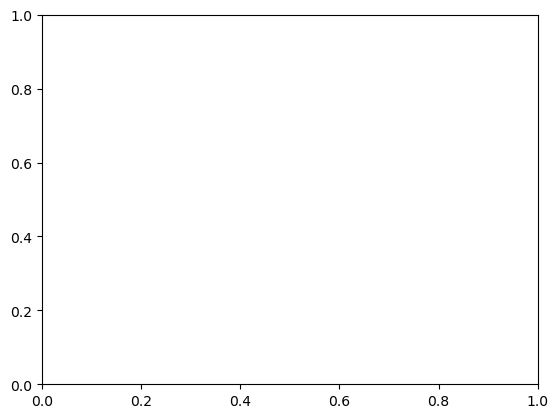

In [ ]:
bar = sns.barplot(data= vaders, x='Rating', y='compound',errorbar=None)
plt.xlabel('Ratings')
plt.ylabel('Compounded Results')
plt.title('Compound score analysis of Star reviews by Caffeine_Corner cafe ')
plt.grid()

for bars in bar.containers:
  bar.bar_label(bars, fmt='%0.2f')

plt.show()

**Insights:**



*   **The conclusion of the compound score analysis of star reviews by Caffeine Corner cafe is that it has a positive overall rating. The chart shows a higher concentration of ratings towards the positive side, with a score of 0.72 for 5 star reviews. There are very few negative reviews, with a score of -0.15 for 1 star reviews.**



# Plot the total no. of positive, Negative and Neutral Ratings

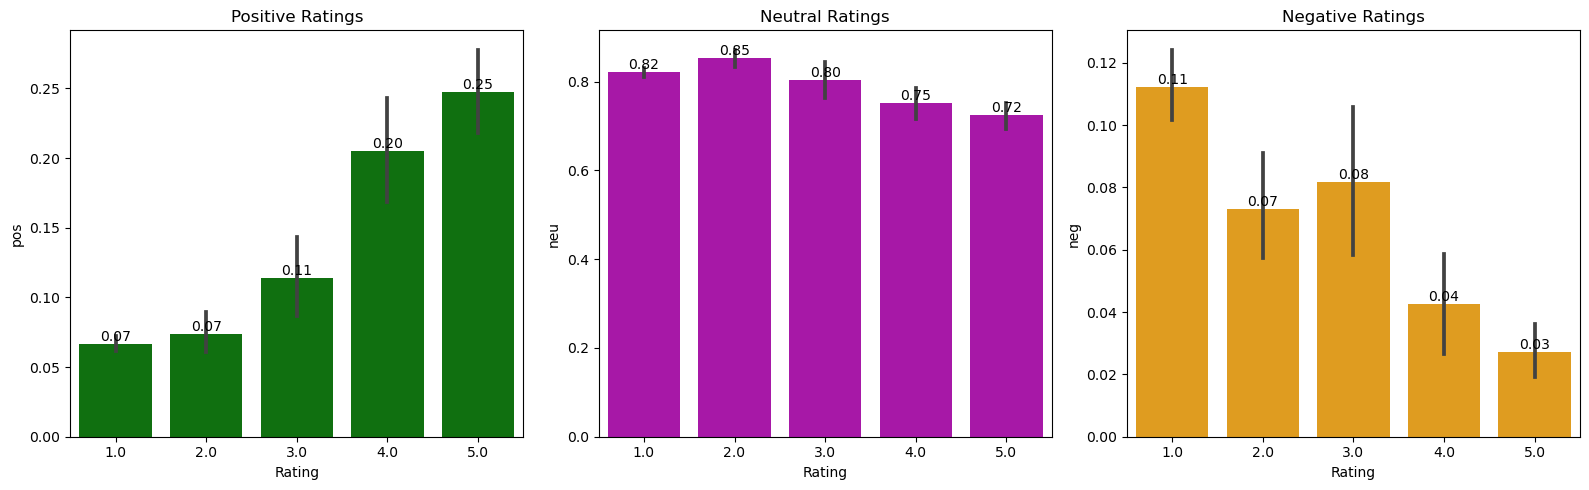

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(16, 5))

ax1 = sns.barplot(data= vaders, x='Rating', y='pos', ax = axs[0], color='g')
ax1.set_title('Positive Ratings')

ax2 = sns.barplot(data= vaders, x='Rating', y='neu', ax = axs[1], color='m')
ax2.set_title('Neutral Ratings')

ax3 = sns.barplot(data= vaders, x='Rating', y='neg', ax = axs[2], color='orange')
ax3.set_title('Negative Ratings')
plt.tight_layout()


for bars in ax1.containers:
  ax1.bar_label(bars,fmt='%0.2f')

for bars in ax2.containers:
  ax2.bar_label(bars, fmt='%0.2f')

for bars in ax3.containers:
  ax3.bar_label(bars, fmt='%0.2f')

**Insights:**


*   **According to the image is that people are more likely to be positive than negative. This is because the leftmost bar chart, which shows positive ratings, is consistently taller than the rightmost bar chart, which shows negative ratings. For all but one rating level (2.0), the height of the bar in the positive ratings chart is more than double the height of the corresponding bar in the negative ratings chart.**



# Challenges in VADER:

1. Sentences which contains negative words which are related to other words in which it makes a positive sentence.

2. This model couldn't pick that kind of relationship between words. This problem solves by Roberta model



In [ ]:
!pip install transformers

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
#we used Roberta model which was previously trained on twitter sentiments

MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Downloading:   0%|          | 0.00/747 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/476M [00:00<?, ?B/s]

# VADER Results

In [ ]:
sentence = input('Sentence:\n')
sentence

Sentence:
If you like to feel fancy, this place is might be your scene. Mostly old aunties gossiping when I went there. The property is beautifully maintained but the food leaves a lot to be desired.


'If you like to feel fancy, this place is might be your scene. Mostly old aunties gossiping when I went there. The property is beautifully maintained but the food leaves a lot to be desired.'

In [ ]:
Find_polarity_score(sentence)

{'neg': 0.048, 'neu': 0.772, 'pos': 0.18, 'compound': 0.6059}

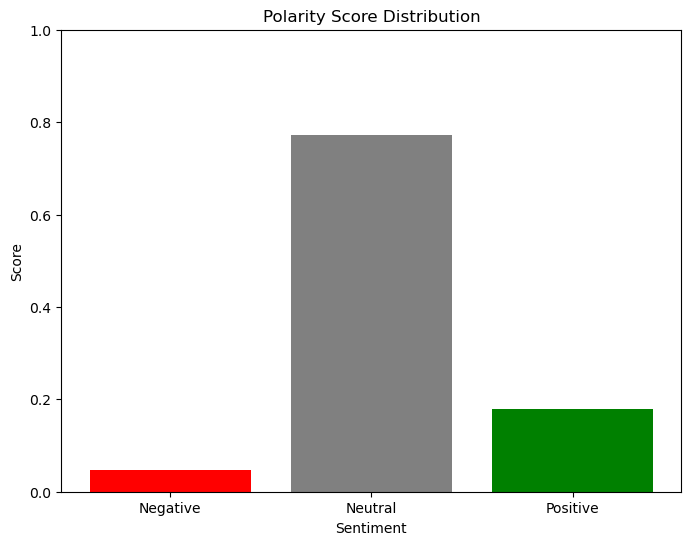

In [ ]:
import matplotlib.pyplot as plt

def plot_polarity_scores(scores):
    labels = ['Negative', 'Neutral', 'Positive']
    values = [scores['neg'], scores['neu'], scores['pos']]

    plt.figure(figsize=(8, 6))
    plt.bar(labels, values, color=['red', 'gray', 'green'])
    plt.title('Polarity Score Distribution')
    plt.xlabel('Sentiment')
    plt.ylabel('Score')
    plt.ylim(0, 1)  # Limit y-axis from 0 to 1
    plt.show()

# Example polarity score
polarity_scores = {'neg': 0.048, 'neu': 0.772, 'pos': 0.18}

# Plot the polarity scores
plot_polarity_scores(polarity_scores)


# Roberta Results

In [ ]:
encoded_text = tokenizer(sentence, return_tensors='pt')
output = model(**encoded_text)


scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores

array([0.08434798, 0.29967403, 0.615978  ], dtype=float32)

In [ ]:
#Creating the dictionary to see the values in proper manner
scores_dict = {
    'R_Negative' : scores[0],
    'R_Neutral' : scores[1],
    'R_Positive' : scores[2]
}
print(scores_dict)

{'R_Negative': 0.08434798, 'R_Neutral': 0.29967403, 'R_Positive': 0.615978}


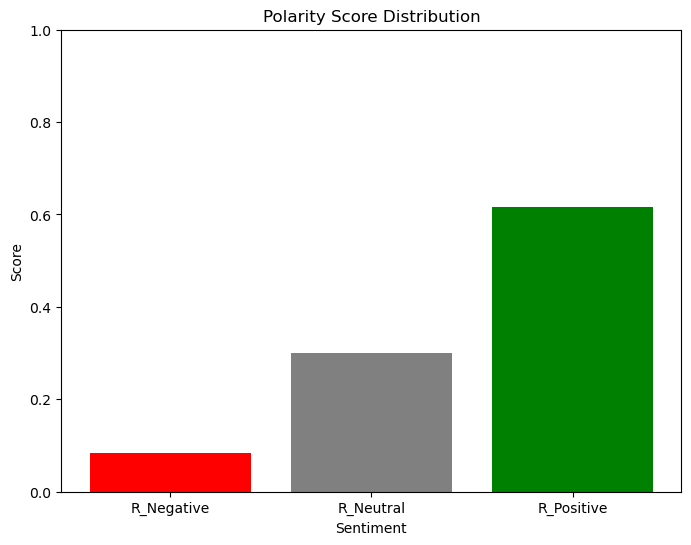

In [ ]:
import matplotlib.pyplot as plt

def score_dict(scores):
    labels = ['R_Negative', 'R_Neutral', 'R_Positive']
    values = [scores['R_Negative'], scores['R_Neutral'], scores['R_Positive']]

    plt.figure(figsize=(8, 6))
    plt.bar(labels, values, color=['red', 'gray', 'green'])
    plt.title('Polarity Score Distribution')
    plt.xlabel('Sentiment')
    plt.ylabel('Score')
    plt.ylim(0, 1)  # Limit y-axis from 0 to 1
    plt.show()

# Example polarity score
scores = {'R_Negative': 0.08434798, 'R_Neutral': 0.29967403, 'R_Positive': 0.615978}

# Plot the polarity scores
score_dict(scores)


In [ ]:
def Roberta_polarity_score(sentence):
  encoded_text = tokenizer(sentence, return_tensors='pt')
  output = model(**encoded_text)

  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores
  scores_dict = {
    'R_Negative' : scores[0],
    'R_Neutral' : scores[1],
    'R_Positive' : scores[2]
   }

  return (scores_dict)

# **BERT Polarity Score**

In [ ]:
def Bert_polarity_score(sentence):
  encoded_text = tokenizer(sentence, return_tensors='pt')
  output = model(**encoded_text)

  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores
  scores_dict = {
    'R_Negative' : scores[0],
    'R_Neutral' : scores[1],
    'R_Positive' : scores[2]
   }

  return (scores_dict)

In [ ]:
df.sample(5)

,name,location,Date,Rating,Review
483,jill,"Hanceville, AL","Reviewed July 23, 2015",1.0,my son justin ** had been going to the store t...
657,Stacy,"Yonkers, NY","Reviewed April 6, 2012",1.0,i went into caffeine_corner and ordered a milk...
250,Thaner,"Winnipeg, MB","Reviewed April 12, 2018",1.0,"teach your employees ""moly"" that maybe they sh..."
762,Martin,"Linsldae, Leighton Buzzard, LA","Reviewed Nov. 5, 2009",1.0,my wife had our baby's surplus milk taken away...
287,Dan,"Gilbert, AZ","Reviewed Oct. 26, 2017",1.0,"well, i have had a lot of issues using my caff..."


In [ ]:
df['Review'][481]

'i have been buying coffee everyday for two years at the caffeine_corner on rainier ave s. and 7th st. in renton. i have complained on two or three different occasions about the horrible customer service at this location. on the morning of july 29th 2015 i went to order my coffee at the location listed. ** was the one working at the cash register and when i ordered i told her that i would use a free one in which i had earned on my app. she was horribly rude and disrespectful. i had noticed this behavior before and i told her that i was not going to tolerate her disrespect no more. she went off and started yelling and went over to another co-worker and then they both started yelling and creating a scene. the acting manager told her to quiet down although she continued. '

In [ ]:
text = input('Enter the Sentence:\n')\

vader_result = print('VADER_Result:', SA.polarity_scores(text))
roberta_result = print('Roberta_Result:', Roberta_polarity_score(text))
bert_result = print('BERT_Result:', Bert_polarity_score(text))

Enter the Sentence:
If you like to feel fancy, this place is might be your scene. Mostly old aunties gossiping when I went there. The property is beautifully maintained but the food leaves a lot to be desired.
VADER_Result: {'neg': 0.048, 'neu': 0.772, 'pos': 0.18, 'compound': 0.6059}
Roberta_Result: {'R_Negative': 0.08434798, 'R_Neutral': 0.29967403, 'R_Positive': 0.615978}
BERT_Result: {'R_Negative': 0.08434798, 'R_Neutral': 0.29967403, 'R_Positive': 0.615978}


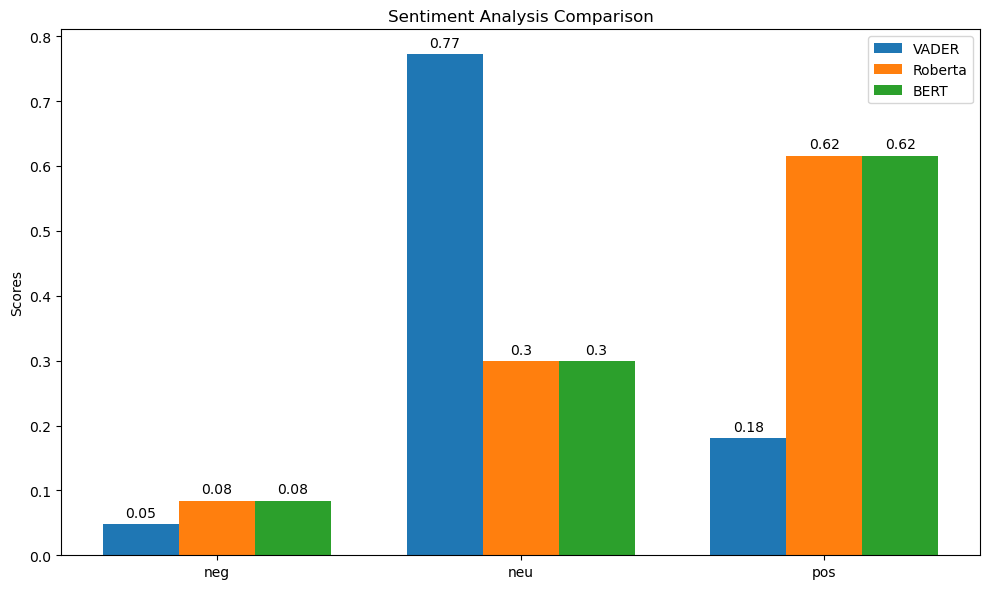

In [ ]:
import matplotlib.pyplot as plt

# Sample data
VADER_Result = {'neg': 0.048, 'neu': 0.772, 'pos': 0.18}
Roberta_Result = {'R_Negative': 0.08434798, 'R_Neutral': 0.29967403, 'R_Positive': 0.615978}
BERT_Result = {'R_Negative': 0.08434798, 'R_Neutral': 0.29967403, 'R_Positive': 0.615978}

# Extract values
vader_values = list(VADER_Result.values())
roberta_values = list(Roberta_Result.values())
bert_values = list(BERT_Result.values())

# Labels
labels = list(VADER_Result.keys())

x = range(len(labels))
width = 0.25  # Width of the bars

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

vader_bars = ax.bar(x, vader_values, width, label='VADER')
roberta_bars = ax.bar([i + width for i in x], roberta_values, width, label='Roberta')
bert_bars = ax.bar([i + width*2 for i in x], bert_values, width, label='BERT')

# Customizing the plot
ax.set_ylabel('Scores')
ax.set_title('Sentiment Analysis Comparison')
ax.set_xticks([i + width for i in x])
ax.set_xticklabels(labels)
ax.legend()

# Adding labels
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(vader_bars)
add_labels(roberta_bars)
add_labels(bert_bars)

plt.tight_layout()
plt.show()


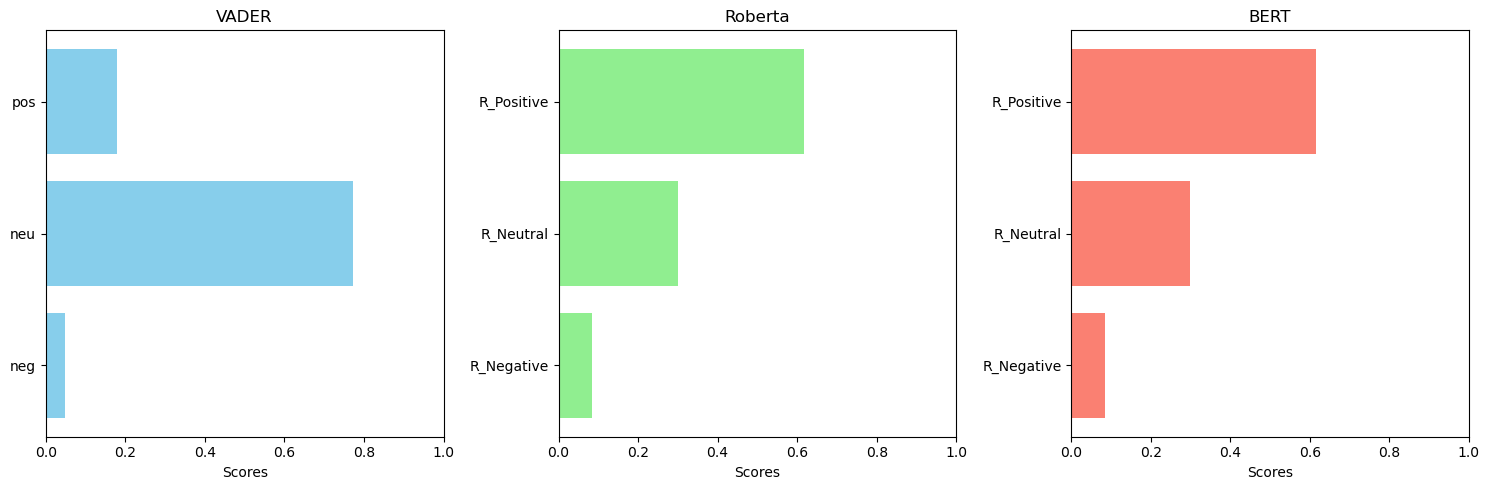

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
VADER_Result = {'neg': 0.048, 'neu': 0.772, 'pos': 0.18}
Roberta_Result = {'R_Negative': 0.08434798, 'R_Neutral': 0.29967403, 'R_Positive': 0.615978}
BERT_Result = {'R_Negative': 0.08434798, 'R_Neutral': 0.29967403, 'R_Positive': 0.615978}

# Labels
vader_labels = list(VADER_Result.keys())
roberta_labels = list(Roberta_Result.keys())
bert_labels = list(BERT_Result.keys())

# Values
vader_values = list(VADER_Result.values())
roberta_values = list(Roberta_Result.values())
bert_values = list(BERT_Result.values())

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# VADER subplot
axs[0].barh(vader_labels, vader_values, color='skyblue')
axs[0].set_title('VADER')
axs[0].set_xlabel('Scores')
axs[0].set_xlim(0, 1)

# Roberta subplot
axs[1].barh(roberta_labels, roberta_values, color='lightgreen')
axs[1].set_title('Roberta')
axs[1].set_xlabel('Scores')
axs[1].set_xlim(0, 1)

# BERT subplot
axs[2].barh(bert_labels, bert_values, color='salmon')
axs[2].set_title('BERT')
axs[2].set_xlabel('Scores')
axs[2].set_xlim(0, 1)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


### Here we can see by comapring all three pre-trained transformers in two different bar plots, VADER is not a good solution due to follwing reasons,  1.Sentences which contains negative words which are related to other words in which it makes a positive sentence. 2.This model couldn't pick that kind of relationship between words. This problem solves by Roberta model. On the other hand, Bert and RObertA performs very good and up to the mark due to they have been trained on large datasets and hence, becomes the good solution for Sentiment Analysis.

In [ ]:
data = pd.DataFrame ({
    'VADER_Result': SA.polarity_scores(text),
    'Roberta_Result': Roberta_polarity_score(text),
    'Bert_Result': Bert_polarity_score(text)
})

print(data)

            VADER_Result  Roberta_Result  Bert_Result
neg               0.0480             NaN          NaN
neu               0.7720             NaN          NaN
pos               0.1800             NaN          NaN
compound          0.6059             NaN          NaN
R_Negative           NaN        0.084348     0.084348
R_Neutral            NaN        0.299674     0.299674
R_Positive           NaN        0.615978     0.615978


In [ ]:
data

,VADER_Result,Roberta_Result,Bert_Result
neg,0.0480,NaN,NaN
neu,0.7720,NaN,NaN
pos,0.1800,NaN,NaN
compound,0.6059,NaN,NaN
R_Negative,NaN,0.084348,0.084348
R_Neutral,NaN,0.299674,0.299674
R_Positive,NaN,0.615978,0.615978


In [ ]:
median_rating = data['VADER_Result'].median()
median_rating

0.39295

In [ ]:
data['VADER_Result'].fillna(value=median_rating, inplace=True)

In [ ]:
median_rating_R = data['Roberta_Result'].median()
median_rating_R

0.29967403411865234

In [ ]:
data['Roberta_Result'].fillna(value=median_rating_R, inplace=True)

In [ ]:
median_rating_B = data['Bert_Result'].median()
median_rating_B

0.29967403411865234

In [ ]:
data['Bert_Result'].fillna(value=median_rating_B, inplace=True)

In [ ]:
data.head(20)

,VADER_Result,Roberta_Result,Bert_Result
neg,0.04800,0.299674,0.299674
neu,0.77200,0.299674,0.299674
pos,0.18000,0.299674,0.299674
compound,0.60590,0.299674,0.299674
R_Negative,0.39295,0.084348,0.084348
R_Neutral,0.39295,0.299674,0.299674
R_Positive,0.39295,0.615978,0.615978


**Conclusion:**



*  **Roberta Model gives the higest accuracy as it was pretraind on large corpus on data like BERT**.

*   **While VADER also gives the better result but it  has Sentences which contains negative words which are related to other words in which it makes a positive sentence, As this model couldn't pick that kind of relationship between words.**

**Insights:**

* **VADER is a lexicon-based method, which means it relies on a list of words and phrases that have been associated with positive or negative sentiment.**

* **ROBERTa and BERT are deep learning models, which means they are trained on a large corpus of text data. This allows them to learn more complex patterns in the data**

## Use cases & Real-World applications

Star rating prediction, often done using machine learning algorithms, has numerous real-world applications across various industries. Some examples include:

E-commerce Platforms: Predicting star ratings for products helps e-commerce platforms recommend products to users based on their preferences. It also aids in improving the overall user experience by providing accurate product ratings, which influence purchase decisions.

Restaurant and Hospitality Industry: Predicting star ratings for restaurants and hotels assists customers in choosing where to dine or stay based on their preferences and past experiences. It also helps business owners identify areas for improvement to enhance customer satisfaction.

Movie and Entertainment Industry: Predicting star ratings for movies, TV shows, or streaming content helps users discover content tailored to their interests. Streaming platforms often use this information to recommend movies and shows to users.

Travel and Tourism: Predicting star ratings for tourist attractions, destinations, and travel accommodations assists travelers in planning their trips and selecting the best options based on their preferences and budget.

Healthcare and Medical Services: Predicting star ratings for healthcare providers, such as hospitals, clinics, and doctors, helps patients make informed decisions about their healthcare options. It also enables healthcare organizations to identify areas for improvement in patient care.

Ride-Sharing and Transportation: Predicting star ratings for drivers and transportation services helps passengers choose reliable and high-quality transportation options. It also allows ride-sharing companies to monitor and maintain service quality.

Online Reviews and Feedback Analysis: Predicting star ratings for user-generated content, such as product reviews, restaurant reviews, or hotel reviews, helps businesses analyze customer feedback at scale. It allows them to identify trends, sentiments, and areas for improvement.

Education and E-learning Platforms: Predicting star ratings for courses, tutorials, or educational materials helps learners choose the most suitable resources based on their learning preferences and goals. It also enables educational platforms to improve course quality and user satisfaction.

Real Estate and Property Rentals: Predicting star ratings for rental properties, apartments, or vacation homes helps renters make informed decisions about where to live or stay during vacations. It also assists property owners in maintaining and improving property quality.

Consumer Products and Services: Predicting star ratings for consumer products and services helps manufacturers and service providers understand customer satisfaction levels and preferences. It enables them to make data-driven decisions to enhance product quality and customer experience.

These are just a few examples of how star rating prediction can be applied in real-world scenarios to improve decision-making, enhance user experiences, and drive business growth.

Sentiment analysis can be a valuable tool for cafe and restaurant businesses in various aspects of their operations. Here are some use cases:

1. **Customer Feedback Analysis**: Restaurants can analyze customer reviews and feedback from various online platforms (such as Yelp, Google Reviews, TripAdvisor, or social media) to understand customer sentiment towards their food, service, ambiance, and overall experience. This analysis can help identify areas of improvement or strengths to leverage.

2. **Menu Optimization**: By analyzing customer sentiment towards specific dishes or menu items mentioned in reviews, restaurants can identify popular dishes and those that receive negative feedback. This information can guide menu optimization efforts, such as removing unpopular items, adjusting recipes, or highlighting customer favorites.

3. **Service Quality Assessment**: Sentiment analysis can help evaluate customer satisfaction with the service provided by staff members. By analyzing feedback related to interactions with waitstaff or the speed of service, restaurants can identify opportunities for staff training or process improvements to enhance the overall dining experience.

4. **Brand Reputation Management**: Monitoring sentiment across social media and review platforms allows restaurants to manage their online reputation effectively. By promptly addressing negative feedback or complaints, restaurants can mitigate potential damage to their reputation and demonstrate responsiveness to customer concerns.

5. **Competitive Analysis**: Restaurants can analyze sentiment towards their competitors to gain insights into their strengths and weaknesses. Understanding customer preferences and sentiments towards competing establishments can inform strategic decisions, such as pricing adjustments, menu differentiations, or marketing campaigns.

6. **Marketing Campaign Effectiveness**: Sentiment analysis can help evaluate the effectiveness of marketing campaigns, promotions, or special events. By analyzing customer sentiment before, during, and after marketing initiatives, restaurants can assess the impact on brand perception, customer engagement, and foot traffic.

7. **Trend Identification**: Sentiment analysis can help restaurants identify emerging trends, preferences, or popular food items among customers. By monitoring sentiment trends over time, restaurants can stay ahead of industry shifts and adjust their offerings or marketing strategies accordingly.

8. **Customer Segmentation**: Analyzing sentiment data allows restaurants to segment their customer base based on preferences, behaviors, or sentiment towards specific aspects of the dining experience. This segmentation can inform targeted marketing efforts, personalized recommendations, or loyalty programs tailored to different customer groups.

Overall, sentiment analysis provides valuable insights for cafe and restaurant businesses to understand customer preferences, improve service quality, manage their reputation, and stay competitive in the industry. By leveraging sentiment analysis tools and techniques, restaurants can make data-driven decisions to enhance the overall dining experience and drive customer satisfaction.